> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - No_show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this project, i will try to investigate the given dataset and clean it if it's messy, The data set explains appointments people showed to or not  in brazil, Some useful data are provided such as ages,apoointment date,health conditions and gender


### Question(s) for Analysis
Some of the questions that i would try to answer is:
Are appointments not shown to related to the age of people?
Are appointments not shown to related to the hospital region?
Are appointments not shown to related to the messages recieved?
Are appointments not shown to related to the appointment date?
does gender makes any difference in kids,youths,middle aged or old people's not-shown appointments ?

imporant libraries imported:

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns

%matplotlib inline



In [4]:
#Reading the file
df=pd.read_csv('noshowapp,ointments-kagglev2-may-2016 (1).csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.shape

(110527, 14)

In [5]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 2.7MB/s eta 0:00:01 1% |▌                               | 153kB 7.3MB/s eta 0:00:02    23% |███████▍                        | 2.4MB 25.4MB/s eta 0:00:01    34% |███████████                     | 3.6MB 26.4MB/s eta 0:00:01    45% |██████████████▌                 | 4.7MB 24.2MB/s eta 0:00:01    53% |█████████████████▏              | 5.6MB 16.4MB/s eta 0:00:01    89% |████████████████████████████▋   | 9.4MB 24.0MB/s eta 0:00:01    99% |████████████████████████████████| 10.4MB 18.6MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.9MB/s eta 0:00:01   10% |███▍                            | 1.4MB 22.1MB/s eta 0:00:01    34% |███████████▏                    | 4.7MB 22.3MB/s eta 0:00:01    42% |█████████████▋                  | 5.7MB 21.5MB/s eta 0:00:01    50% |████████████████                | 6.7MB 21.6MB/s eta 0:00:01    57% |██████████████████▌             | 7.7MB 22.2MB/s eta 0:00:01    65% |█████████████████████      

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [6]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Searching for any missing values

In [7]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [54]:
#df.info()
df.describe()

,appointmentid,age,scholarship,hypertension,alcoholism,handcap,sms_received
count,1.105250e+05,110525.000000,110525.000000,110525.000000,110525.000000,110525.000000,110525.000000
mean,5.675307e+06,37.088559,0.098267,0.197249,0.030400,0.022248,0.321031
std,7.129534e+04,23.110291,0.297677,0.397924,0.171687,0.161544,0.466875
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640287e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680574e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Since there are no missing values in the entire dataframe, no changes regarding nan values would be made, instead i would prefer renaming column names to a lower case name for easier use, change no-show column to a boolean for easier use, separate words in a column name by underscore, Remove some of the data columns that i won't use,Removing some of the ouliers in the dataset and finally creating a new column derived from age column for more clearance.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [9]:

df.columns=df.columns.str.lower()
df.columns



Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

Succesfully changed column names to lower-case names

In [79]:
#drop age = -1
df.drop(df.index[df['age']==-1],inplace=True)


,appointmentid,gender,appointment_day,age,neighbourhood,scholarship,hypertension,alcoholism,handcap,sms_received,no_show,AgeRange


dropped age = 1

In [10]:
df.rename(columns={'patientid':'patient_id','appointmentday':'appointment_day','no-show':'no_show','hipertension':'hypertension'},inplace=True)
df.head()

,patient_id,appointmentid,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Separated words by an underscore in column names

In [11]:
df['no_show'] = df['no_show'].map(
                   {'Yes':True ,'No':False})
df.tail()

,patient_id,appointmentid,gender,scheduledday,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,False
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,False
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,False
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,False
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,False


changed no_show column datatype and data to a boolean for easier use

In [12]:
df.drop('scheduledday',axis=1,inplace=True)
df.drop(('diabetes'),axis=1,inplace=True)
df.drop(('patient_id'),axis=1,inplace=True)



remove unused data columns

In [13]:
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
appointmentid      110527 non-null int64
gender             110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
alcoholism         110527 non-null int64
handcap            110527 non-null int64
sms_received       110527 non-null int64
no_show            110527 non-null bool
dtypes: bool(1), int64(7), object(3)
memory usage: 8.5+ MB


,appointmentid,gender,appointment_day,age,neighbourhood,scholarship,hypertension,alcoholism,handcap,sms_received,no_show
0,5642903,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,False
1,5642503,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,False
2,5642549,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,False
3,5642828,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,False
4,5642494,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,0,0,0,False


<a id='eda'></a>


### Research Question 1 (is age related to appointments not_shown to?)

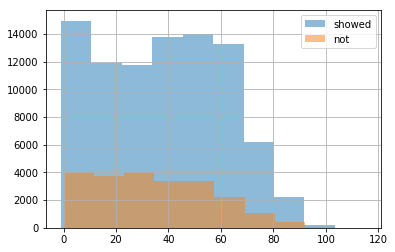

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
showed=df.no_show==False
not_showed=df.no_show==True
df.age[showed].hist(alpha=0.5,label='showed')
df.age[not_showed].hist(alpha=0.5,label='not')
plt.legend();


Both variables seem to be nearly correlated except for ages between 20 and 30, people who didn't show seem to have a high trend while peope who showed have a low trend

### Research Question 2  (Sms recieved related to appointments)

In [15]:
df.groupby('sms_received').no_show.mean()

sms_received
0    0.167033
1    0.275745
Name: no_show, dtype: float64

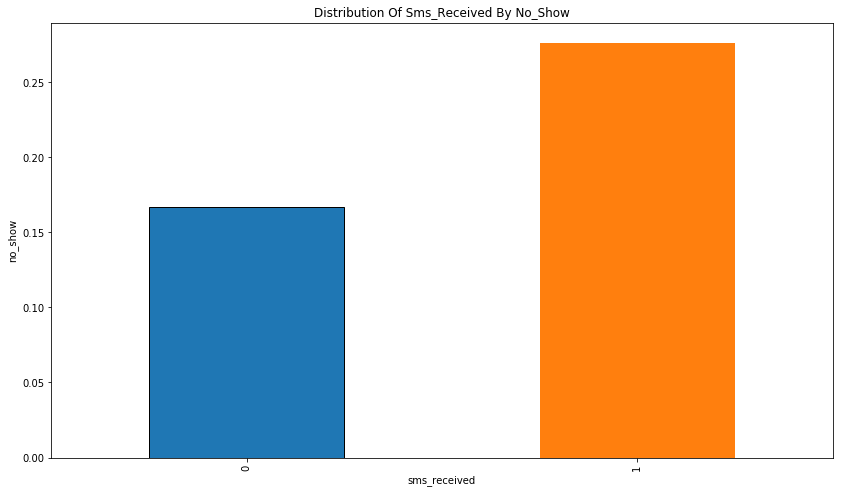

In [50]:
# function for grouping and plotting 
#   Sms_recieved-no_show relationship
def groupbyfunc (df,x,y,figsize=(14,8)):
    
    df.groupby(x)[y].mean().plot(kind='bar',edgecolor='black',figsize=figsize)
    plt.title(f'distribution of {x} by {y}'.title())
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
groupbyfunc(df,'sms_received','no_show')

#df.groupby('sms_received').no_show.mean().plot(kind='bar')

Here it appears that appointments not shown to is increased when there's a sms_received which doesn't make sense to me, so if there's any comment on this i would be grateful

# Neighbourhood related to appointments

In [24]:
df['neighbourhood'].nunique()
df['neighbourhood'].unique()
#print(df['neighbourhood'].value_counts())


array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

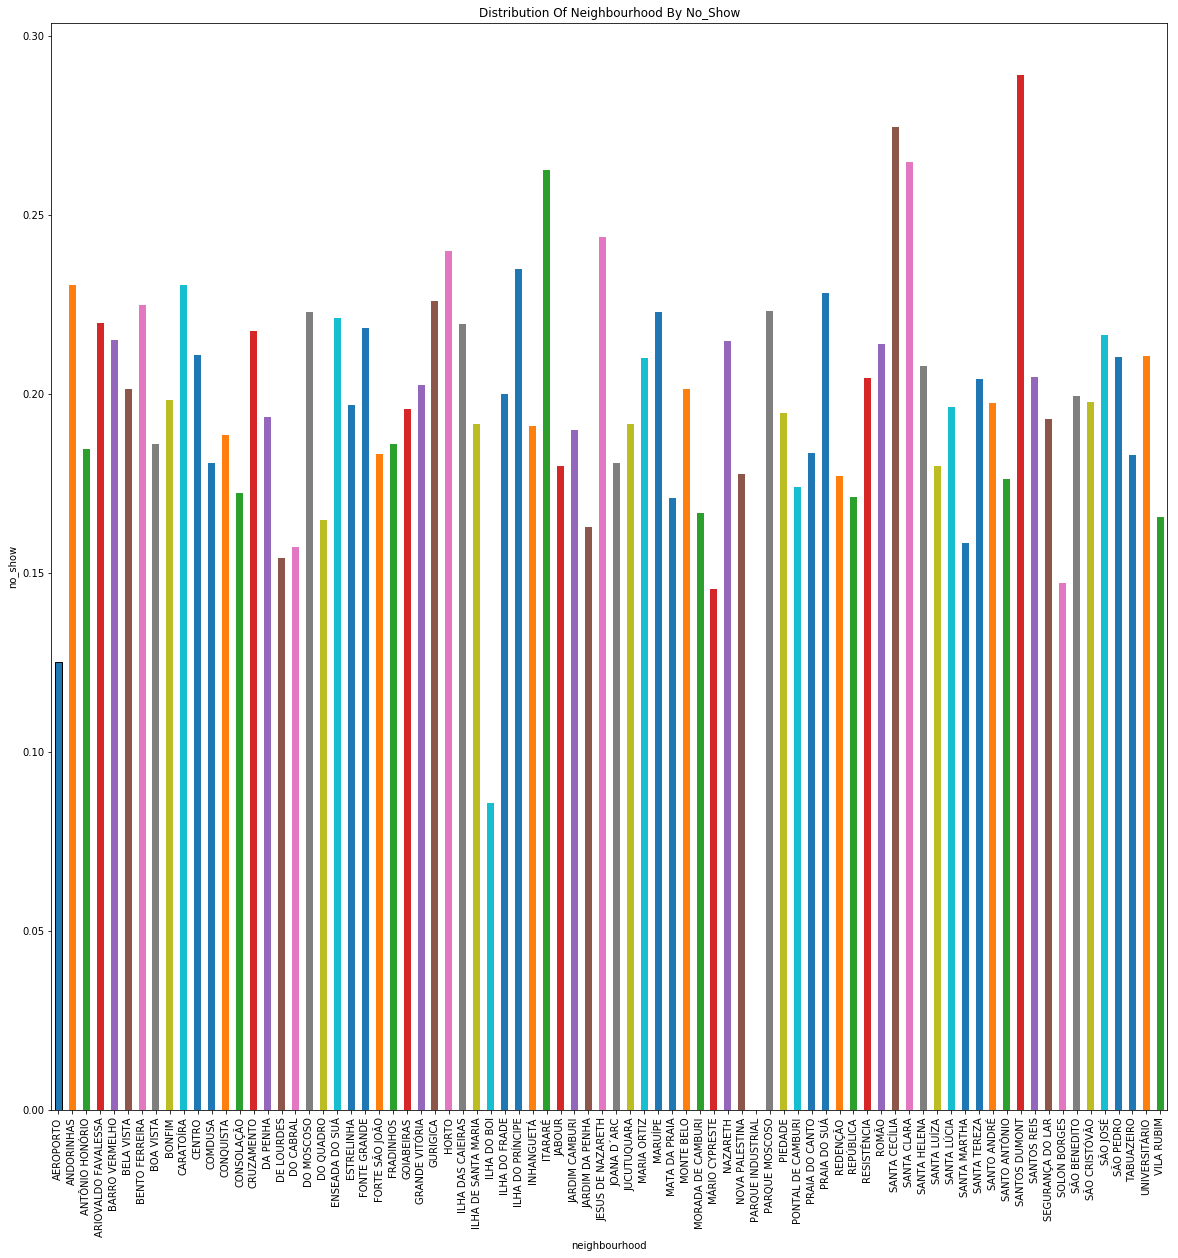

In [27]:
df[df['neighbourhood']=='PARQUE INDUSTRIAL'].index
#df.drop(index=75199,inplace=True)
#df.groupby('neighbourhood').no_show.mean().plot(kind='bar',figsize=(20,20))
df.drop(index=df.query('neighbourhood=="ILHAS OCEÂNICAS DE TRINDADE"').index,inplace=True)
#df.groupby('neighbourhood,').no_show.mean().plot(kind='bar',figsize=(50,20))
groupbyfunc(df,'neighbourhood','no_show',figsize=(20,20))



Here i removed two neighbourhoods because one of them had only 1 data and the other had 2 which i treated them as ouliers, from the plot there seem to be high no-shown appointments in some areas than the others such as santos dumont and santa cecila

# Appointment day related to appointments

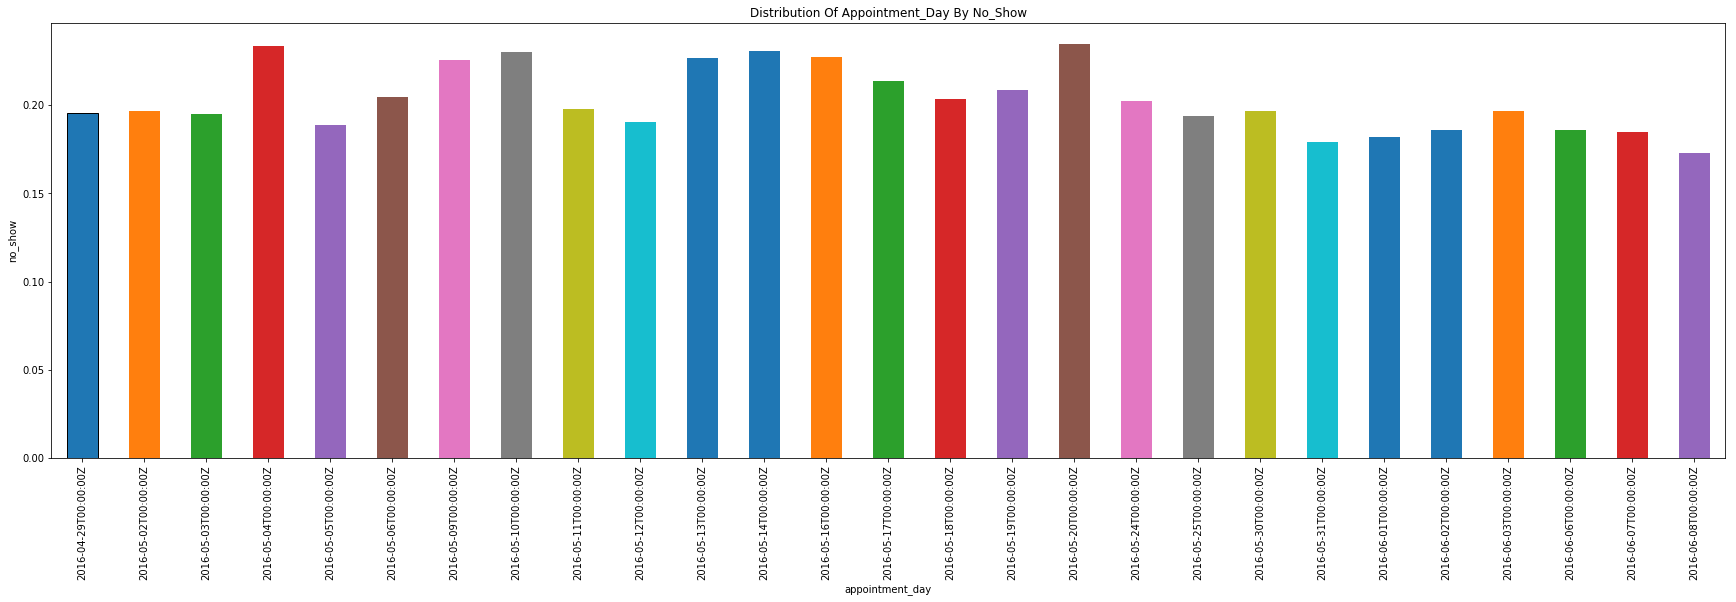

In [47]:

#df.appointment_day[not_showed].size().plot.bar(figsize=(100,8))

groupbyfunc(df,'appointment_day','no_show',figsize=(30,8))

From this plot there seems to be a certain time when people went to there appointments more than usual.

# Finally gender-age relationship with appointments

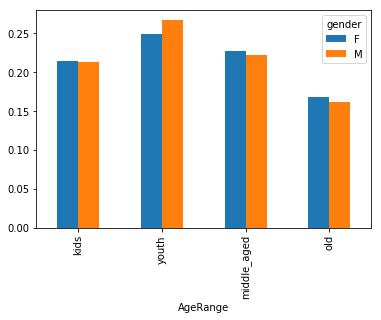

In [51]:
bins = [0, 13, 21,45,100]
names = ['kids','youth', 'middle_aged','old']

df['AgeRange'] = pd.cut(df['age'], bins, labels=names)
df.groupby(['AgeRange','gender']).no_show.mean().unstack('gender').plot(kind='bar')

Creating a new column for differnet age categories for easier visualization 
plotting different categories with no-show appointments
there seems to be correlation in each category except for the youths one,youths appear to ignore there appointments more than the others especially Youth males as they have greater mean than youths females.
old people are more committed to their appointmens other than any other category.

<a id='conclusions'></a>
## Conclusions

> Youths aged between 14-21 are predicted to not show to ther appintments more than the other especially male youths, Certain areas have high no-shown appointment mean than others, sms_messages seem to have a reversed effect
## Limitations
if there was any data provided about the distance between a patient and the appointment hospital, it would effectively help in predicting the no-show appointments, Also data provided isn't equally distributed between each category which made me only use means and averages without the actual numbers provided, Some data didn't make sense such as age=-1, So i had to remove them







In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0